<a href="https://colab.research.google.com/github/thrivenid88/DataScience-2023/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

data = []
nn_range = int(input("Enter the number of elements: "))
# Iterating until the range
i=0
while(i!=nn_range):
    ele = int(input())
    # Adding the element
    data.append(ele)
    i=i+1

print("The list is:", data)

n = len(data)
print("Number of elements:", n)

total = sum(data)

# Finding the mean
mean = total / n
print("The mean of the set is:", mean)

# Calculating the maximum and minimum values
max_value = max(data)
min_value = min(data)
print("Maximum value:", max_value)
print("Minimum value:", min_value)

# Calculating the range
range_x = max_value - min_value
print("The range of the set is:", range_x)

# Calculating the coefficient of range
corange = range_x / (max_value + min_value)
print("The coefficient of range is:", corange)

# Sorting the set
sorted_numbers = sorted(data)
print("The sorted set is:", sorted_numbers)

# Calculating the median
if n % 2 == 0:
    mid_index_1 = n // 2
    mid_index_2 = mid_index_1 - 1
    median = (sorted_numbers[mid_index_1] + sorted_numbers[mid_index_2]) / 2
else:
    mid_index = n // 2
    median = sorted_numbers[mid_index]
print("The median is:", median)

# Determining the mode
frequency = {}
for num in data:
    if num in frequency:
        frequency[num] += 1
    else:
        frequency[num] = 1

max_frequency = max(frequency.values())
mode = [num for num, freq in frequency.items() if freq == max_frequency]
print("Mode:", mode)

# Calculating the variance
variance = sum((item - mean) ** 2 for item in data) / (n - 1)
print("The variance of the set is:", variance)

# Calculating the standard deviation
std = variance ** 0.5
print("The standard deviation is:", std)

Enter the number of elements: 5
4
5
6
7
3
The list is: [4, 5, 6, 7, 3]
Number of elements: 5
The mean of the set is: 5.0
Maximum value: 7
Minimum value: 3
The range of the set is: 4
The coefficient of range is: 0.4
The sorted set is: [3, 4, 5, 6, 7]
The median is: 5
Mode: [4, 5, 6, 7, 3]
The variance of the set is: 2.5
The standard deviation is: 1.5811388300841898


In [1]:
5#Write a program to implement K- Nearest Neighbors’ classifier to find accuracy for training and test fruit data set.
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [3]:
import pandas as pd
data_set= pd.read_csv('/content/drive/MyDrive/User_Data.csv')
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [4]:
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [8]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [9]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [14]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n',cm)

Confusion Matrix : 
 [[64  4]
 [ 3 29]]


<ipython-input-15-4d2d3a9a17b4>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


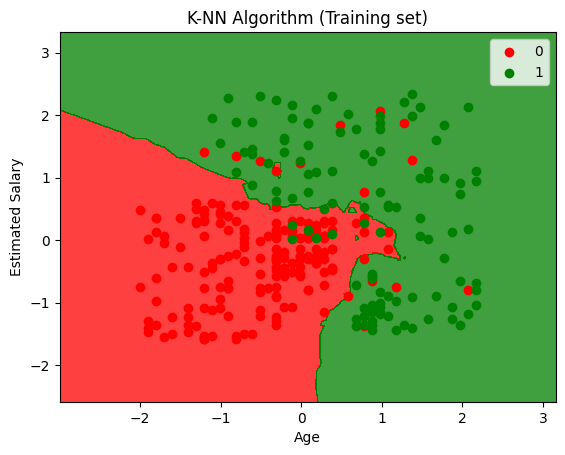

In [15]:
#Visulaizing the trianing set result
import numpy as nm
import matplotlib.pyplot as mtp
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

In [16]:
#splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)


In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [18]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [19]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)


In [22]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
y_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [21]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[62  4]
 [ 7 27]]


<ipython-input-23-4d2d3a9a17b4>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


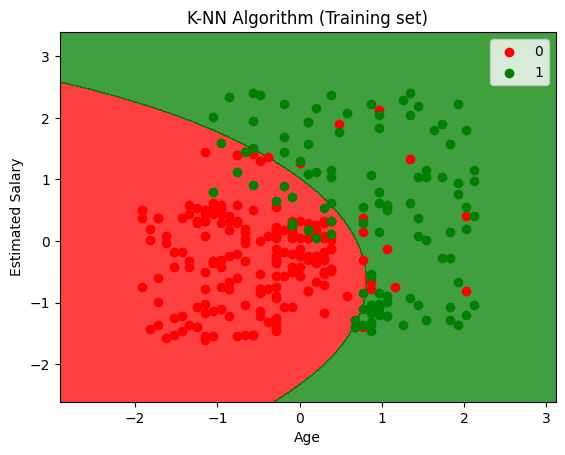

In [23]:
#Visulaizing the trianing set result
import numpy as nm
import matplotlib.pyplot as mtp
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

In [8]:
data_set.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [9]:
data_set.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
data_set.dropna(inplace=True)

In [15]:
print(data_set.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [12]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [1]:
import pandas as pd
data_set= pd.read_csv('/content/User_Data (3).csv')
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19          19000.0          0
1    15810944    Male   35          20000.0          0
2    15668575  Female   26          43000.0          0
3    15603246  Female   27          57000.0          0
4    15804002    Male   19          76000.0          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46          41000.0          1
396  15706071    Male   51          23000.0          1
397  15654296  Female   50          20000.0          1
398  15755018    Male   36          33000.0          0
399  15594041  Female   49          36000.0          1

[400 rows x 5 columns]


In [2]:
data_set.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [3]:
data_set.isnull().sum()

User ID            0
Gender             8
Age                0
EstimatedSalary    7
Purchased          0
dtype: int64

In [7]:
print(data_set.dropna(inplace=True))

None


In [8]:
#Dropping
import pandas as pd
data_set= pd.read_csv('/content/User_Data (3).csv')
print(data_set)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19          19000.0          0
1    15810944    Male   35          20000.0          0
2    15668575  Female   26          43000.0          0
3    15603246  Female   27          57000.0          0
4    15804002    Male   19          76000.0          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46          41000.0          1
396  15706071    Male   51          23000.0          1
397  15654296  Female   50          20000.0          1
398  15755018    Male   36          33000.0          0
399  15594041  Female   49          36000.0          1

[400 rows x 5 columns]


In [9]:
data_set.isnull().sum()

User ID            0
Gender             8
Age                0
EstimatedSalary    7
Purchased          0
dtype: int64

In [12]:
data_set.dropna(inplace=True)

In [13]:
print(data_set.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
